# Lama: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from matplotlib.pyplot import pie, axis, show
from bidi.algorithm import get_display


from sklearn.model_selection import train_test_split




In [2]:
df = pd.read_csv("tamheer_2022.csv")

In [3]:
df.head()

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,تاريخ بداية التدريب,تاريخ نهاية التدريب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,تاريخ الانتهاء,تاريخ الانسحاب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
0,1,ذكر,تيماء,تبوك,NaN,البكالوريوس أو ما يعادلها,2.57,0.0,40,NaN,NaN,مسجل,أخصائي تطوير إداري - منطقة تبوك,أخصائي تطوير إداري,بكالوريوس أو أعلى,1900-01-01 00:00:00,NaN,كبيرة,NaN,Study Group (Embassy CES) - Sydney
1,2,انثى,ام نخيلة,الجوف,علوم الحاسب الآلي والمعلوماتية,دكتوراه,88.93,0.0,51,NaN,NaN,مسجل,مبرمج,محلل مبرمج,بكالوريوس أو أعلى,1900-01-01 00:00:00,NaN,كبيرة,NaN,OAKLAND UNIVERSITY
2,3,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,0.0,37,NaN,NaN,مسجل,هندسة مدنية,مهندس مدني,بكالوريوس أو أعلى,1900-01-01 00:00:00,NaN,عملاقة,نقل المياة عبر خطوط الانابيب,جامعة أم القرى
3,4,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,0.0,37,NaN,NaN,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,1900-01-01 00:00:00,NaN,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
4,5,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,0.0,37,NaN,NaN,مسجل,مهندس مدني - الخدمات العامة,مهندس مدني,بكالوريوس أو أعلى,1900-01-01 00:00:00,NaN,كبيرة,NaN,جامعة أم القرى


In [4]:
df.drop(columns=["تاريخ الانتهاء","تاريخ الانسحاب","تاريخ بداية التدريب","تاريخ نهاية التدريب"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112615 entries, 0 to 112614
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 112615 non-null  int64  
 1   جنس المتدرب                        112372 non-null  object 
 2   مدينة المتدرب                      111386 non-null  object 
 3   منطقة المتدرب                      111386 non-null  object 
 4   تخصص المتدرب                       106131 non-null  object 
 5   مؤهل المتدرب                       112416 non-null  object 
 6   معدل المتدرب                       97855 non-null   float64
 7   المعدل من                          97855 non-null   float64
 8   عمر المتدرب                        112615 non-null  int64  
 9   حالة المتدرب                       112615 non-null  object 
 10  اسم الفرصه التدريبية               112613 non-null  object 
 11  النشاط الاقتصادي للفرصة التدريبية  1126

In [6]:
df.describe()

,ID,معدل المتدرب,المعدل من,عمر المتدرب
count,112615.00000,97855.000000,97855.000000,112615.000000
mean,56308.00000,5.762873,1.685933,25.604156
std,32509.29462,13.806602,2.280288,2.155375
min,1.00000,0.000000,0.000000,24.000000
25%,28154.50000,2.810000,0.000000,24.000000
50%,56308.00000,3.330000,0.000000,25.000000
75%,84461.50000,4.000000,5.000000,26.000000
max,112615.00000,100.000000,5.000000,55.000000


In [7]:
df.isnull().sum()

ID                                       0
جنس المتدرب                            243
مدينة المتدرب                         1229
منطقة المتدرب                         1229
تخصص المتدرب                          6484
مؤهل المتدرب                           199
معدل المتدرب                         14760
المعدل من                            14760
عمر المتدرب                              0
حالة المتدرب                             0
اسم الفرصه التدريبية                     2
النشاط الاقتصادي للفرصة التدريبية        0
مؤهل التدريب                             0
حجم مؤسسة التدريب                        0
النشاط الاقتصادي لمؤسسة التدريب      39207
المؤسسة التعليمية للمتدرب             6462
dtype: int64

In [8]:
df.isnull().mean()*100

ID                                    0.000000
جنس المتدرب                           0.215779
مدينة المتدرب                         1.091329
منطقة المتدرب                         1.091329
تخصص المتدرب                          5.757670
مؤهل المتدرب                          0.176708
معدل المتدرب                         13.106602
المعدل من                            13.106602
عمر المتدرب                           0.000000
حالة المتدرب                          0.000000
اسم الفرصه التدريبية                  0.001776
النشاط الاقتصادي للفرصة التدريبية     0.000000
مؤهل التدريب                          0.000000
حجم مؤسسة التدريب                     0.000000
النشاط الاقتصادي لمؤسسة التدريب      34.815078
المؤسسة التعليمية للمتدرب             5.738134
dtype: float64

In [9]:
df.dropna(subset=['معدل المتدرب'], inplace=True)

In [10]:
df.dropna(subset=['تخصص المتدرب'], inplace=True)

In [11]:
df.dropna(subset=['النشاط الاقتصادي لمؤسسة التدريب'], inplace=True)

In [12]:
df.isnull().mean()*100

ID                                   0.000000
جنس المتدرب                          0.117391
مدينة المتدرب                        1.001174
منطقة المتدرب                        1.001174
تخصص المتدرب                         0.000000
مؤهل المتدرب                         0.000000
معدل المتدرب                         0.000000
المعدل من                            0.000000
عمر المتدرب                          0.000000
حالة المتدرب                         0.000000
اسم الفرصه التدريبية                 0.000000
النشاط الاقتصادي للفرصة التدريبية    0.000000
مؤهل التدريب                         0.000000
حجم مؤسسة التدريب                    0.000000
النشاط الاقتصادي لمؤسسة التدريب      0.000000
المؤسسة التعليمية للمتدرب            0.932417
dtype: float64

### Feature Engineering

In [13]:

df.sample(random_state = 88)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
90548,90549,انثى,الرياض,الرياض,الشريعة,بكالوريوس,4.31,5.0,25,منسحب,أخصائي توظيف,أخصائي توظيف,بكالوريوس أو أعلى,عملاقة,إدارة الأسواق المالية,جامعة الإمام محمد بن سعود الإسلامية


In [14]:

df.sample(random_state = 88)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
90548,90549,انثى,الرياض,الرياض,الشريعة,بكالوريوس,4.31,5.0,25,منسحب,أخصائي توظيف,أخصائي توظيف,بكالوريوس أو أعلى,عملاقة,إدارة الأسواق المالية,جامعة الإمام محمد بن سعود الإسلامية


In [15]:
df.loc[df['المعدل من'] == 4, 'معدل المتدرب'] = df.loc[df['المعدل من'] == 4, 'معدل المتدرب'] * 5/4
df['المعدل من'] = 5


##### Checking the difference before and after 

In [16]:

df.sample(random_state = 88)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
90548,90549,انثى,الرياض,الرياض,الشريعة,بكالوريوس,4.31,5,25,منسحب,أخصائي توظيف,أخصائي توظيف,بكالوريوس أو أعلى,عملاقة,إدارة الأسواق المالية,جامعة الإمام محمد بن سعود الإسلامية


In [17]:
df.sample(random_state = 22)

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
38194,38195,انثى,الرس,القصيم,التمويل,بكالوريوس,4.31,5,25,مسجل,تخصصات مالية,أخصائي تحليل مالي,بكالوريوس أو أعلى,عملاقة,مراكز الصرافة,جامعة القصيم


In [18]:
df.isnull().sum()

ID                                     0
جنس المتدرب                           70
مدينة المتدرب                        597
منطقة المتدرب                        597
تخصص المتدرب                           0
مؤهل المتدرب                           0
معدل المتدرب                           0
المعدل من                              0
عمر المتدرب                            0
حالة المتدرب                           0
اسم الفرصه التدريبية                   0
النشاط الاقتصادي للفرصة التدريبية      0
مؤهل التدريب                           0
حجم مؤسسة التدريب                      0
النشاط الاقتصادي لمؤسسة التدريب        0
المؤسسة التعليمية للمتدرب            556
dtype: int64

In [19]:
df

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
2,3,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,هندسة مدنية,مهندس مدني,بكالوريوس أو أعلى,عملاقة,نقل المياة عبر خطوط الانابيب,جامعة أم القرى
3,4,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
10,11,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,89.63,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
11,12,ذكر,الخرخير,نجران,تقنية هندسة الآلات الدقيقة والتحكم,دبلوم,2.05,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,المؤسسة العامة للتدريب التقني والمهني
14,15,ذكر,الخرخير,نجران,تقنية هندسة الآلات الدقيقة والتحكم,دبلوم,3.67,5,37,مسجل,مهندس مدني,مهندس مدني,بكالوريوس أو أعلى,متوسطة فئة أ,الاستشارات الهندسية للتخطيط الحضري,المؤسسة العامة للتدريب التقني والمهني
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112607,112608,انثى,مكة المكرمة,مكة المكرمة,العقيدة,بكالوريوس,2.66,5,24,مسجل,اخصائي تجربة المريض,أخصائي خدمة عملاء,بكالوريوس أو أعلى,عملاقة,التشغيل الطبي للمستشفيات,جامعة أم القرى
112611,112612,انثى,ابها,عسير,نظم المعلومات,بكالوريوس,4.13,5,24,متدرب نشط,أخصائي إستمرارية الأعمال,أخصائي استمرارية الأعمال,بكالوريوس أو أعلى,عملاقة,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,جامعة الملك خالد
112612,112613,انثى,ابها,عسير,نظم المعلومات,بكالوريوس,4.13,5,24,متدرب نشط,اخصائي موارد بشرية,أخصائي عمليات موارد بشرية,بكالوريوس أو أعلى,متوسطة فئة أ,أنشطة خدمات صيانة المباني,جامعة الملك خالد
112613,112614,انثى,ابها,عسير,نظم المعلومات,بكالوريوس,4.13,5,24,متدرب نشط,اخصائي خدمة العملاء,أخصائي خدمة عملاء,بكالوريوس أو أعلى,كبيرة,خدمات الاختبارات والتقييم,جامعة الملك خالد


In [21]:
df.columns

Index(['ID', 'جنس المتدرب', 'مدينة المتدرب', 'منطقة المتدرب', 'تخصص المتدرب',
       'مؤهل المتدرب', 'معدل المتدرب', 'المعدل من', 'عمر المتدرب',
       'حالة المتدرب', 'اسم الفرصه التدريبية',
       'النشاط الاقتصادي للفرصة التدريبية', 'مؤهل التدريب',
       'حجم مؤسسة التدريب', 'النشاط الاقتصادي لمؤسسة التدريب',
       'المؤسسة التعليمية للمتدرب'],
      dtype='object')

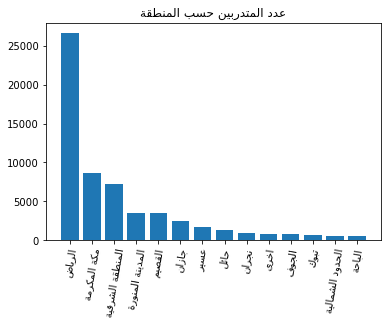

In [36]:
values = df['منطقة المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.bar(labels, values)
title = "عدد المتدربين حسب المنطقة"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.xticks(rotation=80)
plt.show()

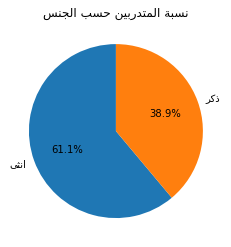

In [37]:


values = df['جنس المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.pie(values, labels=labels, autopct=lambda pct: "{:.1f}%".format(pct), startangle=90)
title = "نسبة المتدربين حسب الجنس"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.show()


In [24]:
df.columns

Index(['ID', 'جنس المتدرب', 'مدينة المتدرب', 'منطقة المتدرب', 'تخصص المتدرب',
       'مؤهل المتدرب', 'معدل المتدرب', 'المعدل من', 'عمر المتدرب',
       'حالة المتدرب', 'اسم الفرصه التدريبية',
       'النشاط الاقتصادي للفرصة التدريبية', 'مؤهل التدريب',
       'حجم مؤسسة التدريب', 'النشاط الاقتصادي لمؤسسة التدريب',
       'المؤسسة التعليمية للمتدرب'],
      dtype='object')

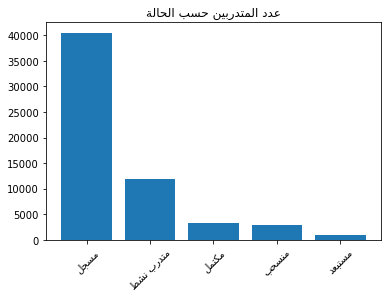

In [38]:

values = df['حالة المتدرب'].value_counts()
total = sum(values)

fig, ax = plt.subplots()
labels = [arabic_reshaper.reshape(text) for text in values.index]
labels = [get_display(label) for label in labels]
ax.bar(labels, values)
title = "عدد المتدربين حسب الحالة"
title = arabic_reshaper.reshape(title)
title = get_display(title)
ax.set_title(title)

plt.xticks(rotation=45)
plt.show()

In [26]:
df.corr()


,ID,معدل المتدرب,المعدل من,عمر المتدرب
ID,1.000000,-0.106379,NaN,-0.674514
معدل المتدرب,-0.106379,1.000000,NaN,0.146336
المعدل من,NaN,NaN,NaN,NaN
عمر المتدرب,-0.674514,0.146336,NaN,1.000000


In [28]:
df.dtypes

ID                                     int64
جنس المتدرب                           object
مدينة المتدرب                         object
منطقة المتدرب                         object
تخصص المتدرب                          object
مؤهل المتدرب                          object
معدل المتدرب                         float64
المعدل من                              int64
عمر المتدرب                            int64
حالة المتدرب                          object
اسم الفرصه التدريبية                  object
النشاط الاقتصادي للفرصة التدريبية     object
مؤهل التدريب                          object
حجم مؤسسة التدريب                     object
النشاط الاقتصادي لمؤسسة التدريب       object
المؤسسة التعليمية للمتدرب             object
dtype: object

In [29]:
df.head()

,ID,جنس المتدرب,مدينة المتدرب,منطقة المتدرب,تخصص المتدرب,مؤهل المتدرب,معدل المتدرب,المعدل من,عمر المتدرب,حالة المتدرب,اسم الفرصه التدريبية,النشاط الاقتصادي للفرصة التدريبية,مؤهل التدريب,حجم مؤسسة التدريب,النشاط الاقتصادي لمؤسسة التدريب,المؤسسة التعليمية للمتدرب
2,3,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,هندسة مدنية,مهندس مدني,بكالوريوس أو أعلى,عملاقة,نقل المياة عبر خطوط الانابيب,جامعة أم القرى
3,4,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,2.05,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
10,11,ذكر,الخرخير,نجران,الهندسة المدنية,بكالوريوس,89.63,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,جامعة أم القرى
11,12,ذكر,الخرخير,نجران,تقنية هندسة الآلات الدقيقة والتحكم,دبلوم,2.05,5,37,مسجل,مهندس مدني مؤسسه مقاولات,مهندس مدني,بكالوريوس أو أعلى,صغيرة فئة ب,الإنشاءات العامة للمباني السكنية,المؤسسة العامة للتدريب التقني والمهني
14,15,ذكر,الخرخير,نجران,تقنية هندسة الآلات الدقيقة والتحكم,دبلوم,3.67,5,37,مسجل,مهندس مدني,مهندس مدني,بكالوريوس أو أعلى,متوسطة فئة أ,الاستشارات الهندسية للتخطيط الحضري,المؤسسة العامة للتدريب التقني والمهني


In [39]:
# Data Preprocessing

In [27]:
X = df.drop('معدل المتدرب', axis=1)
y = df['معدل المتدرب']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
